In [6]:
#dataset->https://drive.google.com/file/d/1cB1xI4ppWu9rFKDzDbMltSaB9oN7apMs/view?usp=sharing

## **Problem Statement**
Insurance premiums are often based on various factors that in the end decide the amount that will be covered from the insurance company. As a data analyst/scientist you are given a set of historical data for an organizations, customers and the respective charges that were levied upon the insurance company.

The data gives you the information about the users including their age, sex, bmi, hospitalization history, annual income, etc. Analyze and gather insights from the data and create a linear regression model that will best predict the insurance charges for a new set of data.

## Dataset Information
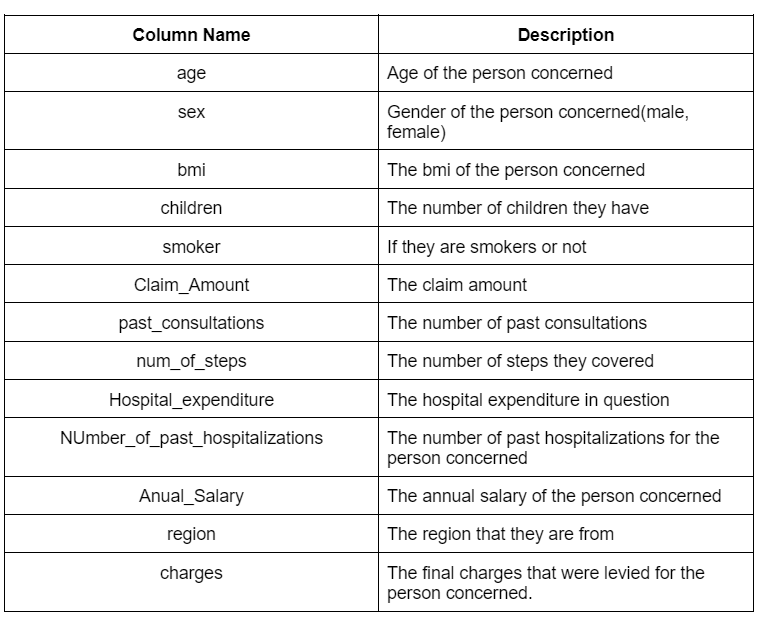

In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
insurance=pd.read_csv('/content/new_insurance_data.csv')
insurance.head()

age   sex    bmi  children smoker  Claim_Amount  past_consultations  \
0  18.0  male  23.21       0.0     no   29087.54313                17.0   
1  18.0  male  30.14       0.0     no   39053.67437                 7.0   
2  18.0  male  33.33       0.0     no   39023.62759                19.0   
3  18.0  male  33.66       0.0     no   28185.39332                11.0   
4  18.0  male  34.10       0.0     no   14697.85941                16.0   

   num_of_steps  Hospital_expenditure  NUmber_of_past_hospitalizations  \
0      715428.0           4720920.992                              0.0   
1      699157.0           4329831.676                              0.0   
2      702341.0           6884860.774                              0.0   
3      700250.0           4274773.550                              0.0   
4      711584.0           3787293.921                              0.0   

   Anual_Salary     region    charges  
0   55784970.05  southeast  1121.8739  
1   13700885.19  southeast  1131.5066  
2   73523107.27  southeast  1135.9407  
3   75819679.60  southeast  1136.3994  
4   23012320.01  southeast  1137.0110

In [9]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [10]:
# Size and Dimensions of the data
insurance.shape

(1338, 13)

In [11]:
# Dataset details
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

The null values are present in the data. We try to manipulate it by filling average values.

In [12]:
insurance.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [13]:
# Checking for duplicates
insurance.duplicated().sum()

np.int64(0)

There are no duplicate records in the data.

In [14]:
# Filling null values by Median
insurance['age'].fillna(insurance['age'].median(),inplace=True)
insurance['bmi'].fillna(insurance['bmi'].median(),inplace=True)
insurance['children'].fillna(insurance['children'].median(),inplace=True)
insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].median(),inplace=True)
insurance['past_consultations'].fillna(insurance['past_consultations'].median(),inplace=True)
insurance['num_of_steps'].fillna(insurance['num_of_steps'].median(),inplace=True)
insurance['Hospital_expenditure'].fillna(insurance['Hospital_expenditure'].median(),inplace=True)
insurance['NUmber_of_past_hospitalizations'].fillna(insurance['NUmber_of_past_hospitalizations'].median(),inplace=True)
insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median(),inplace=True)

/tmp/ipython-input-2509978150.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  insurance['age'].fillna(insurance['age'].median(),inplace=True)
/tmp/ipython-input-2509978150.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [15]:
insurance.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

All the null values are removed from the data.

**Checking distribution of each variable in the dataset.**

In [16]:
numeric_cols=insurance.select_dtypes(include=['int64','float64']).columns
categorical_cols=insurance.select_dtypes(include=['object']).columns

/tmp/ipython-input-186704904.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance[col_name])


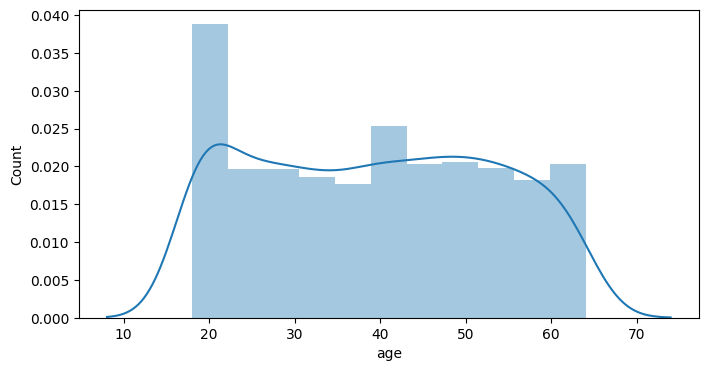

/tmp/ipython-input-186704904.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance[col_name])


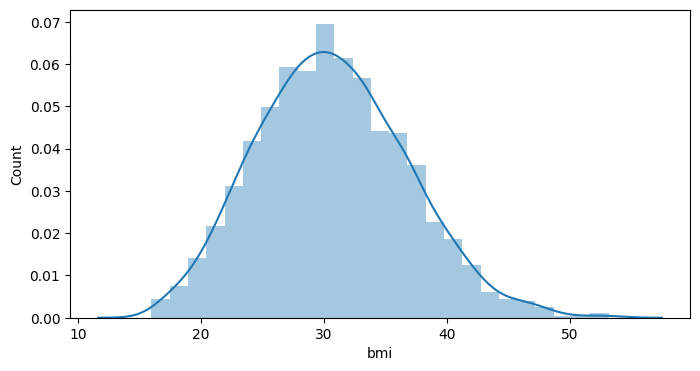

/tmp/ipython-input-186704904.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance[col_name])


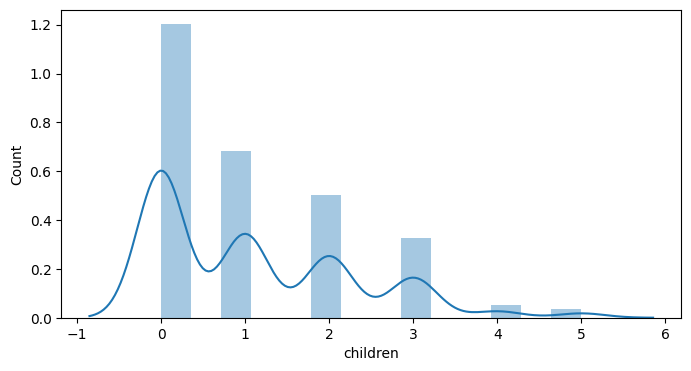

/tmp/ipython-input-186704904.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance[col_name])


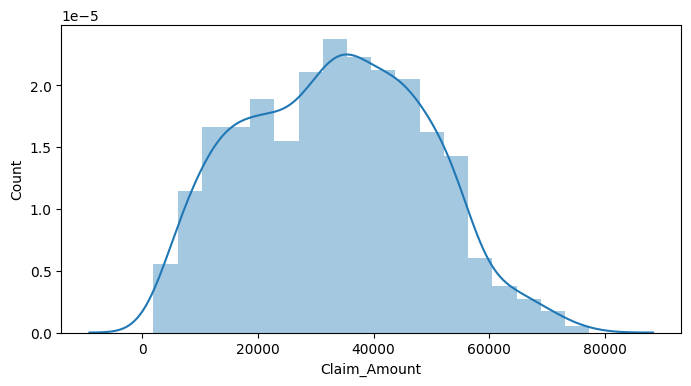

/tmp/ipython-input-186704904.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance[col_name])


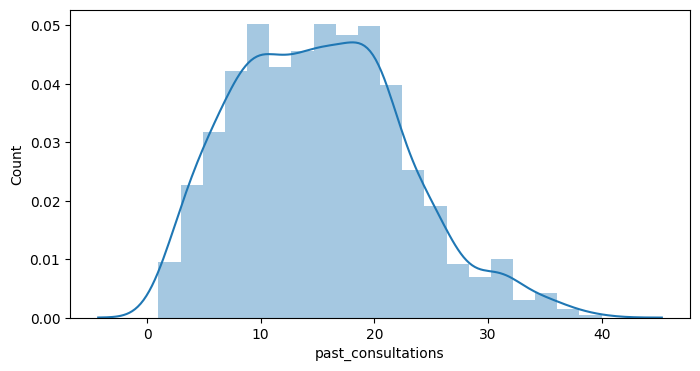

/tmp/ipython-input-186704904.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance[col_name])


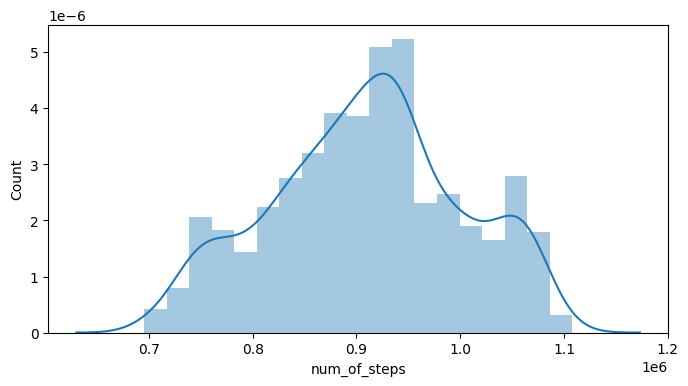

/tmp/ipython-input-186704904.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance[col_name])


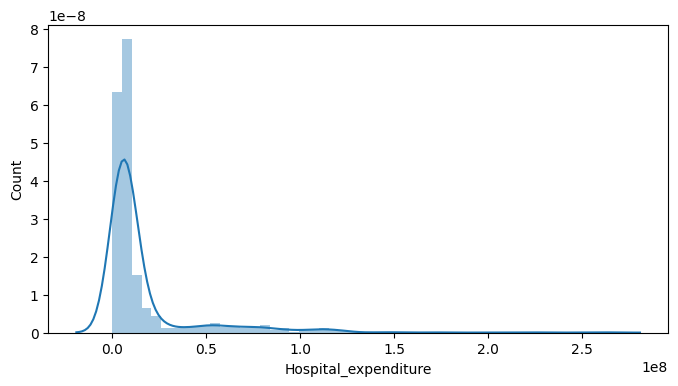

/tmp/ipython-input-186704904.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance[col_name])


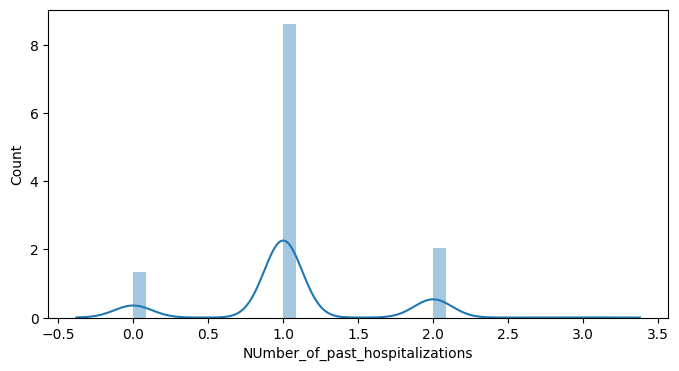

/tmp/ipython-input-186704904.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance[col_name])


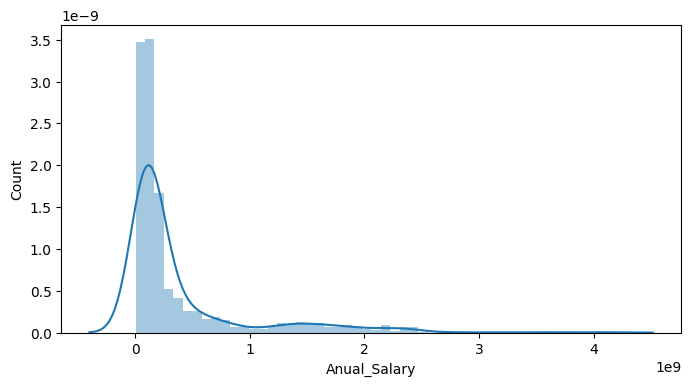

/tmp/ipython-input-186704904.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance[col_name])


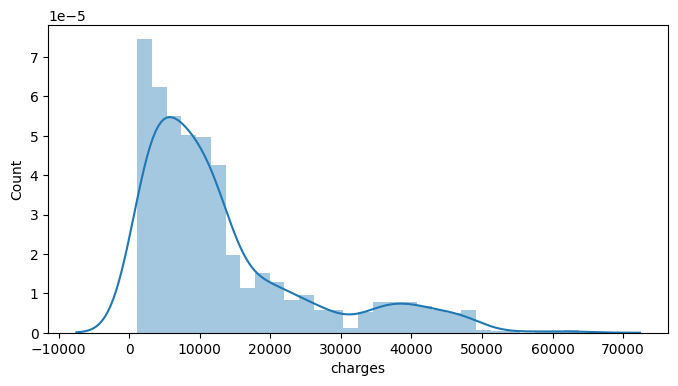

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

for col_name in numeric_cols:
  plt.figure(figsize=(8,4))
  sns.distplot(insurance[col_name])
  plt.xlabel(col_name)
  plt.ylabel('Count')
  plt.show()

From the above distribution plots we can observe that,

i) The 'age' column is slightly right skewed. Most of the people having age from 20 to 65. But some outliers are preent in the data(more aged people).

ii) The 'bmi' curve looks roughly normal but slightly right-skewed — meaning there are some higher-than-typical BMI values (possible outliers) on the right tail.

iii) The 'Children' plot shows right skewed distribution. Most of the Policyholders have 0 childrens and the childrens count increases number of policyholders decreases.

iv) The 'claim_amount' plot shows bell shaped like structure but it is right skewed. Most of the claim values are between range 20000 to 50000. No extreme outliers present- few policyholders claim about 80000.

v) The 'past_consultations' plot is slightly right skewed.Most customers have between 8–20 consultations.
A smaller number have very high consultations (30+), which might be due to chronic illnesses or frequent hospital visits.

vi) The 'num_of_steps' distribution is approximately normal, centered around 900,000–950,000 steps.
Slight right skew, meaning a few people have exceptionally high step counts (>1,050,000).
Very few low step counts (<750,000), which might indicate low activity.

vii) The 'Hospital_Expenditure' distribution is strongly right skewed. Most customers have low expenditures (clustered near zero).
A few have extremely high expenditures (up to 250M), which are clear outliers.

viii) For 'The number_of_past_hospitalizations', Most customers have 1 hospitalization in the past.
Some have 0 or 2, and very few have more than 2.
The distribution is heavily concentrated, which suggests:
Hospitalization is not very frequent for most people.
This could be a strong predictor of claim amounts — higher past hospitalizations might indicate higher risk.

ix) For the Annual Salary distribution:
Highly right-skewed distribution.
Most people have lower annual salaries, concentrated near the left side of the plot.
A few extremely high salaries act as outliers.

x) For the charges distribution:
Right-skewed distribution.
Majority of the values are on the lower side, with a long tail towards higher charges.
This suggests a small group of people incur very high charges. The outliers present on the right side.



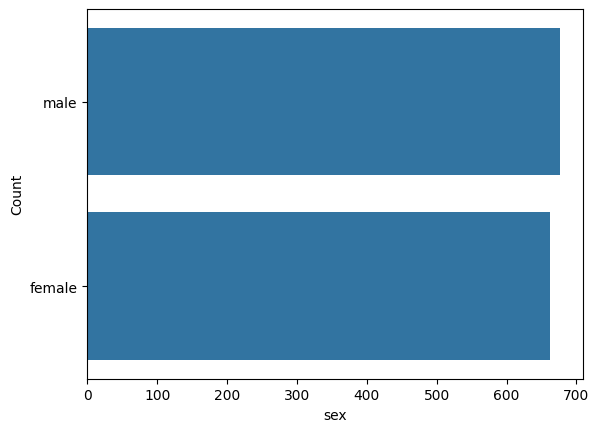

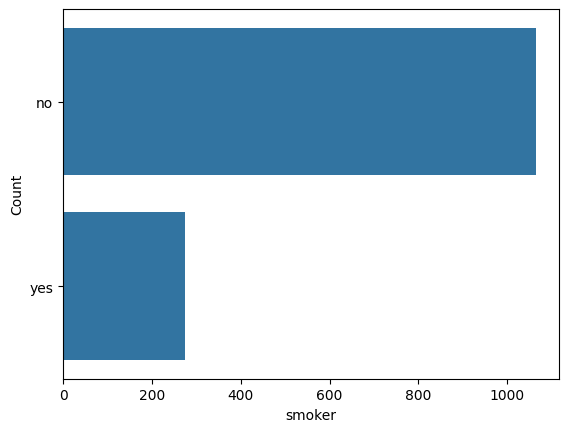

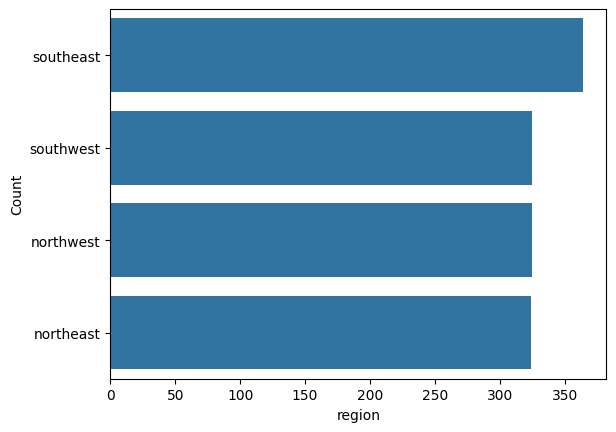

In [18]:
for col_name in categorical_cols:
  sns.countplot(insurance[col_name])
  plt.xlabel(col_name)
  plt.ylabel("Count")
  plt.show()

In [19]:
categorical_cols

Index(['sex', 'smoker', 'region'], dtype='object')

**Encoding the categorical attributes.**

In [20]:
# Reload dataset
from sklearn.preprocessing import OneHotEncoder
insurance = pd.read_csv("/content/new_insurance_data.csv")

categorical_cols = ['sex', 'smoker', 'region']
ohe = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid dummy variable trap

encoded = ohe.fit_transform(insurance[categorical_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded,
                          columns=ohe.get_feature_names_out(categorical_cols),
                          index=insurance.index)

# Concatenate with original DF (and drop original column)
insurance = pd.concat([insurance.drop(columns=categorical_cols), encoded_df], axis=1)


## **Measure of Peakedness and Outlier detection using Boxplot**

In [21]:
import seaborn as sns

<Axes: ylabel='age'>

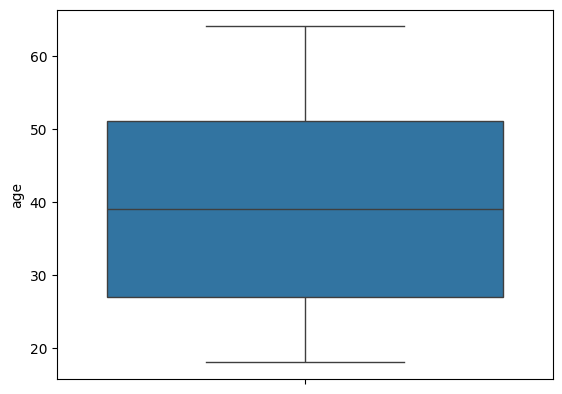

In [22]:
sns.boxplot(insurance['age'])

<Axes: ylabel='bmi'>

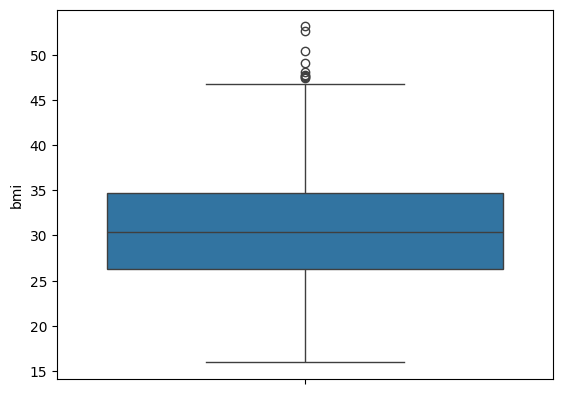

In [23]:
sns.boxplot(insurance['bmi'])

<Axes: ylabel='children'>

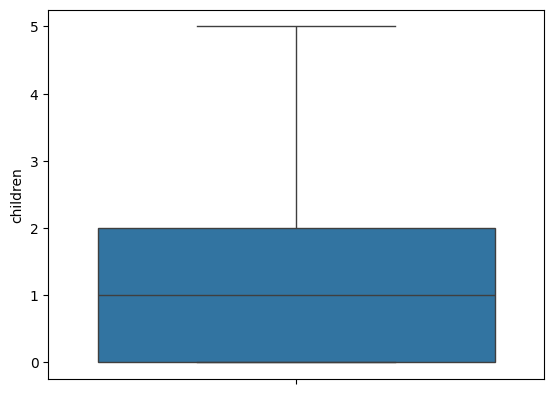

In [24]:
sns.boxplot(insurance['children'])

<Axes: ylabel='Claim_Amount'>

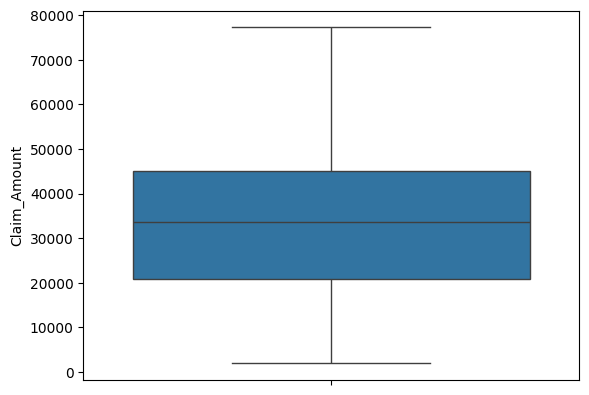

In [25]:
sns.boxplot(insurance['Claim_Amount'])

<Axes: ylabel='past_consultations'>

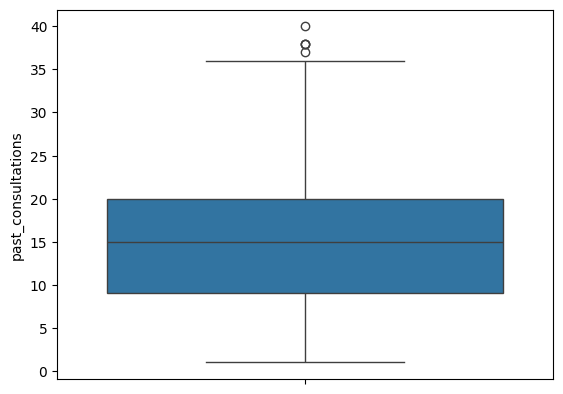

In [26]:
sns.boxplot(insurance['past_consultations'])

<Axes: ylabel='num_of_steps'>

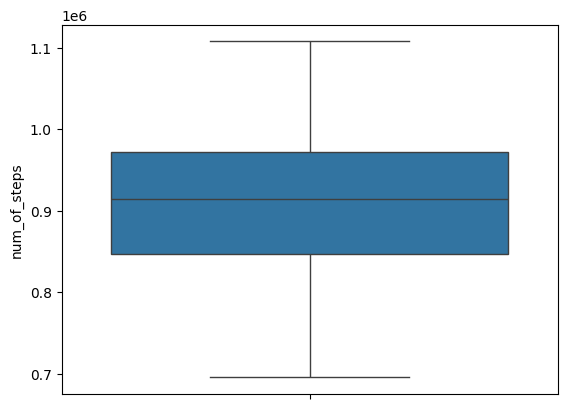

In [27]:
sns.boxplot(insurance['num_of_steps'])

<Axes: ylabel='Hospital_expenditure'>

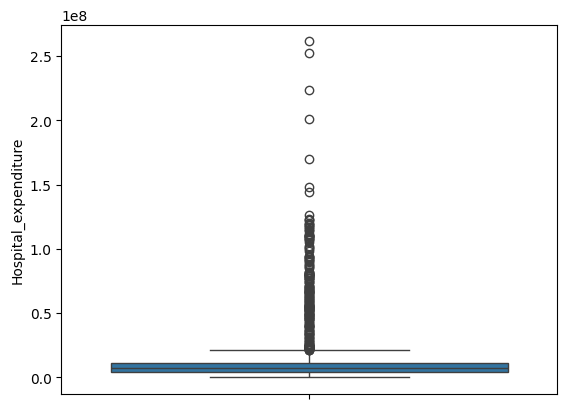

In [28]:
sns.boxplot(insurance['Hospital_expenditure'])

<Axes: ylabel='Anual_Salary'>

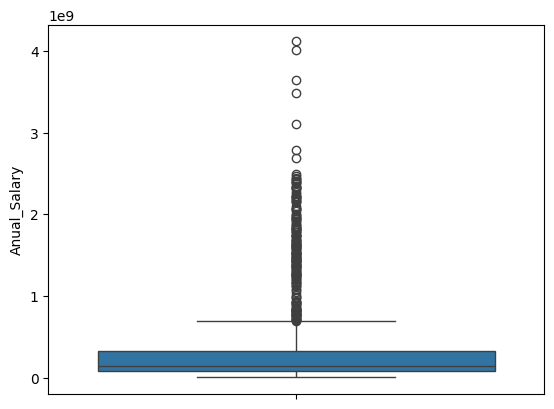

In [29]:
sns.boxplot(insurance['Anual_Salary'])

<Axes: ylabel='charges'>

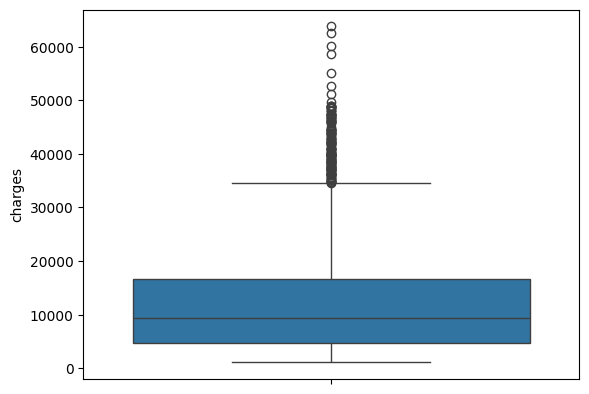

In [30]:
sns.boxplot(insurance['charges'])

There are presence of outliers in the columns 'charges', 'annual_salary', 'hospital_expenditure', 'past_consultations', 'bmi', etc.

We will not treat the outliers, since the target variable also consists of outliers which is driven from the other independent variables.


# **Feature Selection for Data Modeling.**

In [31]:
correlation = insurance.corr()
correlation

age       bmi  children  Claim_Amount  \
age                              1.000000  0.112849  0.041558      0.123430   
bmi                              0.112849  1.000000  0.007944      0.093893   
children                         0.041558  0.007944  1.000000      0.041778   
Claim_Amount                     0.123430  0.093893  0.041778      1.000000   
past_consultations               0.169275  0.131246  0.054787      0.273779   
num_of_steps                     0.517930  0.136368  0.163522      0.400672   
Hospital_expenditure             0.136930  0.257141  0.025150      0.374159   
NUmber_of_past_hospitalizations  0.363041  0.137575  0.185607      0.381152   
Anual_Salary                     0.164328  0.241941  0.040070      0.409268   
charges                          0.294390  0.198794  0.070747      0.439161   
sex_male                        -0.019170  0.045220  0.018621     -0.003904   
smoker_yes                      -0.028893  0.003611  0.009469      0.336230   
region_northwest                 0.001941 -0.137597  0.027062      0.010851   
region_southeast                -0.010480  0.272040 -0.021081      0.036121   
region_southwest                 0.010612 -0.006301  0.018631     -0.020833   

                                 past_consultations  num_of_steps  \
age                                        0.169275      0.517930   
bmi                                        0.131246      0.136368   
children                                   0.054787      0.163522   
Claim_Amount                               0.273779      0.400672   
past_consultations                         1.000000      0.562344   
num_of_steps                               0.562344      1.000000   
Hospital_expenditure                       0.544640      0.626659   
NUmber_of_past_hospitalizations            0.503798      0.850089   
Anual_Salary                               0.596322      0.739426   
charges                                    0.629836      0.890642   
sex_male                                   0.050514      0.010353   
smoker_yes                                 0.504498      0.665903   
region_northwest                          -0.010561     -0.016293   
region_southeast                           0.045064      0.019687   
region_southwest                          -0.029294     -0.044167   

                                 Hospital_expenditure  \
age                                          0.136930   
bmi                                          0.257141   
children                                     0.025150   
Claim_Amount                                 0.374159   
past_consultations                           0.544640   
num_of_steps                                 0.626659   
Hospital_expenditure                         1.000000   
NUmber_of_past_hospitalizations              0.657247   
Anual_Salary                                 0.969695   
charges                                      0.874079   
sex_male                                     0.070981   
smoker_yes                                   0.664056   
region_northwest                            -0.049229   
region_southeast                             0.096169   
region_southwest                            -0.024653   

                                 NUmber_of_past_hospitalizations  \
age                                                     0.363041   
bmi                                                     0.137575   
children                                                0.185607   
Claim_Amount                                            0.381152   
past_consultations                                      0.503798   
num_of_steps                                            0.850089   
Hospital_expenditure                                    0.657247   
NUmber_of_past_hospitalizations                         1.000000   
Anual_Salary                                            0.743466   
charges                                                 0.823581   
sex_mal

Inferences

There is a strong to moderate correlation of the charges column with the following columns:

1. smoker
2. Claim_Amount
3. past_consultations
4. num_of_steps
5. Hospital_expenditure
6. NUmber_of_past_hospitalizations
7. Anual_Salary

The column 'age', 'sex', 'region', 'children', 'sex' shows no considerable correlation with the charges column, so we will not be considering these features for the initial model

<Axes: >

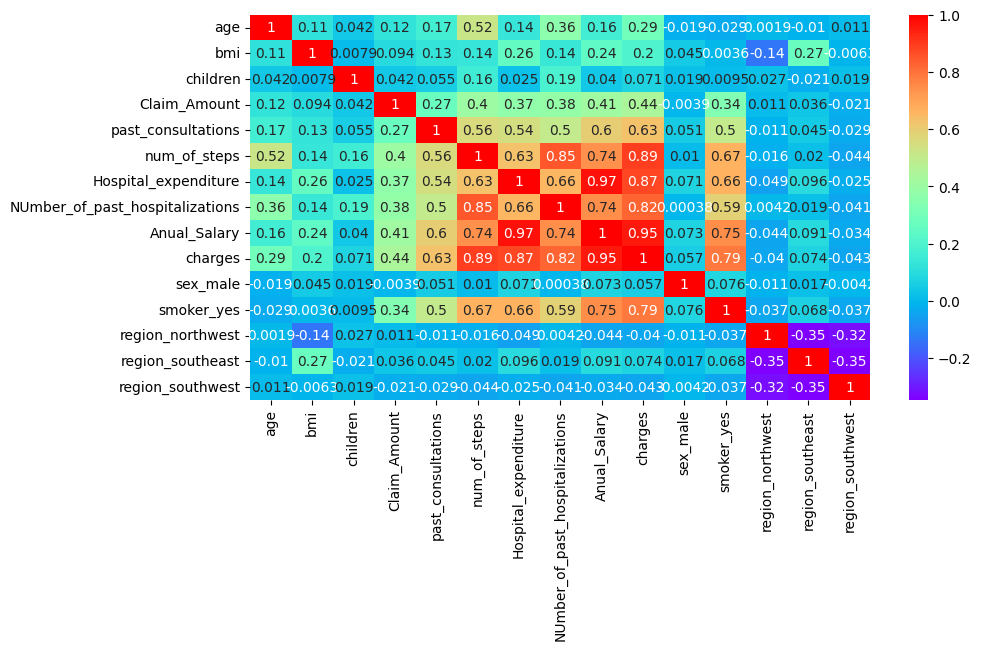

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot=True,cmap='rainbow')

The correlation heatmap shows the columns that will be most useful for the modeling. The sex, children, and region column shows no considerable correlation.

# **Data Preprocessing before model training**

In [49]:
from sklearn.model_selection import train_test_split

# Since 'sex' and 'region' are already encoded and removed, we drop only the columns that still exist
X = insurance.drop(['charges', 'age', 'bmi', 'children'], axis=1)  # Independent variables
y = insurance['charges']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (1070, 11)
Shape of X_test: (268, 11)


In [50]:
X_train

Claim_Amount  past_consultations  num_of_steps  Hospital_expenditure  \
560    29622.26103                 6.0      886052.0          7.579867e+06   
1285   66824.70947                23.0     1063413.0          8.042196e+07   
1142   36320.75384                16.0     1001618.0          1.772151e+07   
969    24827.43078                 8.0      962113.0          1.214312e+07   
486    47348.03370                10.0      888358.0          6.034962e+06   
...            ...                 ...           ...                   ...   
1095   47554.34106                19.0     1007896.0          1.132722e+07   
1130   63672.07916                14.0     1000863.0          2.295519e+07   
1294   42578.49702                24.0     1061168.0          9.188836e+07   
860    27369.02461                22.0      943007.0          3.634140e+06   
1126   37385.45533                26.0     1029035.0          1.579127e+07   

      NUmber_of_past_hospitalizations  Anual_Salary  sex_male  smoker_yes  \
560                               1.0  1.589946e+08       0.0         0.0   
1285                              2.0  1.919607e+09       0.0         1.0   
1142                              2.0  7.139574e+08       0.0         0.0   
969                               1.0  2.928227e+08       0.0         0.0   
486                               1.0  5.093163e+07       0.0         0.0   
...                               ...           ...       ...         ...   
1095                              1.0  5.662888e+08       1.0         0.0   
1130                              2.0  6.472972e+08       1.0         0.0   
1294                              2.0  2.038383e+09       1.0         1.0   
860                               1.0  1.877743e+08       0.0         0.0   
1126                              2.0  6.863093e+08       1.0         0.0   

      region_northwest  region_southeast  region_southwest  
560                1.0               0.0               0.0  
1285               1.0               0.0               0.0  
1142               0.0               0.0               0.0  
969                0.0               0.0               0.0  
486                0.0               0.0               0.0  
...                ...               ...               ...  
1095               0.0               0.0               1.0  
1130               0.0               0.0               1.0  
1294               0.0               1.0               0.0  
860                1.0               0.0               0.0  
1126               1.0               0.0               0.0  

[1070 rows x 11 columns]

In [51]:
X_test

Claim_Amount  past_consultations  num_of_steps  Hospital_expenditure  \
764   41178.474530                24.0      919493.0          6.906061e+06   
887   55587.429360                14.0      932871.0          1.062849e+07   
890    8819.797107                 9.0      941079.0          6.113974e+06   
1293  46520.247900                23.0     1060988.0          9.420315e+07   
259   48614.570180                11.0      830382.0          8.850428e+06   
...            ...                 ...           ...                   ...   
109   33257.707940                20.0      778453.0          4.589846e+06   
575   42904.689350                 6.0      890322.0          5.825061e+06   
535   51973.371980                14.0      903427.0          8.454802e+06   
543    9922.222111                 8.0      883190.0          5.802739e+06   
846   27388.677040                18.0      950172.0          7.295768e+06   

      NUmber_of_past_hospitalizations  Anual_Salary  sex_male  smoker_yes  \
764                               1.0  1.492232e+08       0.0         0.0   
887                               1.0  1.695991e+08       0.0         0.0   
890                               1.0  2.035393e+08       0.0         0.0   
1293                              2.0  1.980373e+09       1.0         1.0   
259                               1.0  5.636327e+07       0.0         0.0   
...                               ...           ...       ...         ...   
109                               0.0  2.694118e+07       0.0         0.0   
575                               1.0  1.120603e+08       1.0         0.0   
535                               1.0  5.952122e+07       0.0         0.0   
543                               1.0  1.327601e+08       1.0         0.0   
846                               1.0  1.789610e+08       0.0         0.0   

      region_northwest  region_southeast  region_southwest  
764                0.0               1.0               0.0  
887                0.0               1.0               0.0  
890                0.0               0.0               0.0  
1293               0.0               1.0               0.0  
259                0.0               0.0               0.0  
...                ...               ...               ...  
109                0.0               0.0               1.0  
575                0.0               0.0               1.0  
535                0.0               0.0               1.0  
543                0.0               0.0               0.0  
846                0.0               0.0               0.0  

[268 rows x 11 columns]

In [52]:
y_train

560      7731.85785
1285    42983.45850
1142    25656.57526
969     14449.85440
486      6753.03800
           ...     
1095    21797.00040
1130    24603.04837
1294    44260.74990
860     12235.83920
1126    24476.47851
Name: charges, Length: 1070, dtype: float64

In [53]:
y_test

764     10928.84900
887     12648.70340
890     12797.20962
1293    44202.65360
259      3925.75820
           ...     
109      2154.36100
575      8062.76400
535      7371.77200
543      7448.40395
846     12029.28670
Name: charges, Length: 268, dtype: float64

# **Standardizing the Features**

In [54]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
sc = StandardScaler()

# Fit on training data and transform
X_train = sc.fit_transform(X_train)

# Transform test data
X_test = sc.transform(X_test)


In [55]:
X_train

array([[-0.2457309 , -1.23338465, -0.25442042, ...,  1.76504522,
        -0.62852656, -0.56223942],
       [ 2.14271388,  1.08072229,  1.6774429 , ...,  1.76504522,
        -0.62852656, -0.56223942],
       [ 0.18432091,  0.12785473,  1.00435528, ..., -0.56655772,
        -0.62852656, -0.56223942],
       ...,
       [ 0.58607603,  1.21684623,  1.65298976, ..., -0.56655772,
         1.59102267, -0.56223942],
       [-0.39039156,  0.94459835,  0.36594864, ...,  1.76504522,
        -0.62852656, -0.56223942],
       [ 0.25267611,  1.4890941 ,  1.30298856, ...,  1.76504522,
        -0.62852656, -0.56223942]])

In [56]:
y_train_arr=y_train.values
y_train=y_train_arr.reshape((-1,1))

In [57]:
y_train

array([[ 7731.85785],
       [42983.4585 ],
       [25656.57526],
       ...,
       [44260.7499 ],
       [12235.8392 ],
       [24476.47851]])

In [58]:
y_train=sc.fit_transform(y_train)

# **Model Building**

In [59]:
# Filling null values by Median
insurance['age'].fillna(insurance['age'].median(),inplace=True)
insurance['bmi'].fillna(insurance['bmi'].median(),inplace=True)
insurance['children'].fillna(insurance['children'].median(),inplace=True)
insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].median(),inplace=True)
insurance['past_consultations'].fillna(insurance['past_consultations'].median(),inplace=True)
insurance['num_of_steps'].fillna(insurance['num_of_steps'].median(),inplace=True)
insurance['Hospital_expenditure'].fillna(insurance['Hospital_expenditure'].median(),inplace=True)
insurance['NUmber_of_past_hospitalizations'].fillna(insurance['NUmber_of_past_hospitalizations'].median(),inplace=True)
insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median(),inplace=True)

/tmp/ipython-input-2509978150.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  insurance['age'].fillna(insurance['age'].median(),inplace=True)
/tmp/ipython-input-2509978150.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [60]:
insurance.isna().sum()

age                                0
bmi                                0
children                           0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
charges                            0
sex_male                           0
smoker_yes                         0
region_northwest                   0
region_southeast                   0
region_southwest                   0
dtype: int64

In [61]:
from sklearn.linear_model import LinearRegression

model_uno = LinearRegression()
#fitting the model
model_uno.fit(X_train, y_train)

LinearRegression()

In [62]:
import numpy as np
print(np.any(np.isnan(X_train)), np.any(np.isinf(X_train)))
print(np.any(np.isnan(y_train)), np.any(np.isinf(y_train)))


False False
False False


In [63]:
insurance.isna().sum()

age                                0
bmi                                0
children                           0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
charges                            0
sex_male                           0
smoker_yes                         0
region_northwest                   0
region_southeast                   0
region_southwest                   0
dtype: int64

In [64]:
#predictions - Model
predictions = model_uno.predict(X_test)
predictions

array([[-1.94381147e-01],
       [-1.41032881e-01],
       [-1.02141547e-01],
       [ 2.53273849e+00],
       [-7.28147817e-01],
       [ 2.94835985e-01],
       [-1.07170791e-01],
       [-1.65297250e-01],
       [ 2.44939729e+00],
       [-2.55673611e-01],
       [-2.24672177e-01],
       [-3.35770857e-01],
       [-1.11525773e+00],
       [-6.57309714e-01],
       [-1.04469710e-01],
       [-6.36902802e-02],
       [-3.28233481e-01],
       [-3.15348956e-01],
       [-4.18931372e-01],
       [-4.50802964e-02],
       [-4.89459461e-01],
       [-3.76221937e-01],
       [-4.51347183e-01],
       [-9.30913678e-01],
       [ 8.43518403e-01],
       [-3.48927748e-01],
       [-7.99515166e-02],
       [-4.88511016e-01],
       [-6.96036200e-01],
       [-9.08607803e-02],
       [ 2.20648480e+00],
       [-5.67212043e-02],
       [-2.03674428e-01],
       [ 9.60611797e-01],
       [ 6.19043414e-01],
       [-2.89420872e-01],
       [-5.83919860e-01],
       [ 2.30921182e+00],
       [ 1.1

In [65]:
predictions=sc.inverse_transform(predictions)
predictions

array([[10838.90034367],
       [11477.18675879],
       [11942.50290349],
       [43467.57823658],
       [ 4452.63825688],
       [16692.14859622],
       [11882.33041396],
       [11186.87522267],
       [42470.44077729],
       [10105.56542285],
       [10476.48270765],
       [ 9147.24030589],
       [ -178.94614156],
       [ 5300.18216738],
       [11914.6475484 ],
       [12402.55386141],
       [ 9237.42140111],
       [ 9391.57856341],
       [ 8152.26464644],
       [12625.21338884],
       [ 7308.42990906],
       [ 8663.26254358],
       [ 7764.42502746],
       [ 2026.64202066],
       [23256.87044931],
       [ 8989.82442043],
       [12207.99597084],
       [ 7319.77759774],
       [ 4836.83834698],
       [12077.47186481],
       [39564.10945183],
       [12485.93551072],
       [10727.71069729],
       [24657.83673167],
       [20571.13492557],
       [ 9701.79564061],
       [ 6178.25656104],
       [40793.1888721 ],
       [26846.4964101 ],
       [ 1197.9524316 ],


In [66]:
y_test

764     10928.84900
887     12648.70340
890     12797.20962
1293    44202.65360
259      3925.75820
           ...     
109      2154.36100
575      8062.76400
535      7371.77200
543      7448.40395
846     12029.28670
Name: charges, Length: 268, dtype: float64

# **Model Evaluation**

In [67]:
# R2 score

In [68]:
from sklearn.metrics import *
r2_score(y_test,predictions)

0.9711828012265369

R2 Score is 0.9712 which is close to 1. Our model is Good Fitted. It explains about 97.12% of variation in target variable on the effect of Independent variables.

In [69]:
!pip install ydata-profiling

In [70]:
from ydata_profiling import ProfileReport

profile=ProfileReport(insurance,title="ML Profile Report",explorative=True)

In [71]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 62.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [72]:
profile.to_file("dataset_profile_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]